# Задание 3

Исследуйте модификации градиентного спуска (Nesterov, Momentum, AdaGrad, RMSProp, Adam).

In [106]:
import random
from helper import *

def stochastic_gradient_descent(f, initial_point, learning_rate=0.1, max_epochs=1000, minimum = 0.0, epsilon=1e-20, batch_size=1, apply_min=False):
    """
    Cтохастический градиентный спуск для поиска минимума функции.

    Аргументы:
        f (function): Изначальная функция.
        grad_fn (function): Функция, которая принимает точку и возвращает градиент в этой точке.
        initial_point (list): Начальную точка, с которой начинается поиск.
        learning_rate (float): Скорость обучения или шаг градиентного спуска.
        max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
        minimum (float): Минимум функции.
        epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        batch_size (int): кол-во координат по которым вычисляется градиент
    Возвращает:
        Кортеж, содержащий найденную минимальную точку, значение функции в этой точке и список всех точек, посещенных во время алгоритма.
    """

    batch_size = min(batch_size, len(initial_point))

    current_point = initial_point.copy() # текущая точка, инициализируется начальной точкой
    current_value = f(current_point) # значение функции в текущей точке
    visited_points = [current_point.copy()] # список посещенных точек, начинается с начальной точки
    for _ in range(max_epochs): # цикл по эпохам
        if apply_min and abs(current_value - minimum) < epsilon: # если достигнуто достаточно малое значение функции, то останавливаемся
            break
        prev_point = np.copy(current_point) 
        for _ in range(batch_size):
            random_index = random.randint(0, len(current_point)-1) # выбираем случайный индекс измерения
            gradient_random_index = fast_gradient(f, current_point, random_index) # вычисляем градиент в текущей точке в случайном индексе
            current_point[random_index] -= learning_rate * gradient_random_index # обновляем текущую точку

        new_value = f(current_point) # вычисляем значение функции в обновленной точке
        if new_value < current_value: # если значение функции в обновленной точке меньше, чем в предыдущей, то продолжаем движение
            current_value = new_value
        else: # если значение функции больше или не изменилось, то возвращаемся к предыдущей точке
            current_point = prev_point
        visited_points.append(current_point.copy()) # добавляем текущую точку в список посещенных
    print(f'Steps count: {len(visited_points)}')
    return current_point, current_value, visited_points # возвращаем результат работы функции

## Тестировани и отладка

Steps count: 222
Steps count: 112
222 112 44
stochastic      ==>   0.000000 in [  0.000000,   0.000000]
mini-batch      ==>   0.000000 in [  0.000000,  -0.000000]
constant        ==>   0.000007 in [  0.001701,   0.002042]


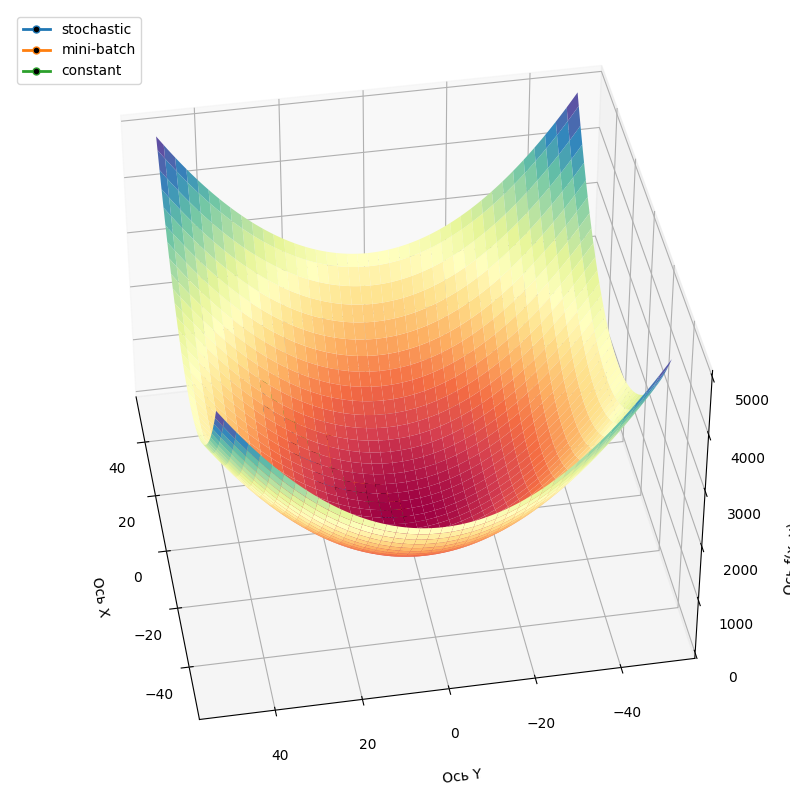

In [107]:
import numpy as np
import math

from helper import *

def f(x):
    return x[0]**2 + x[1]**2

def grad_f(x):
    return [2*x[0], 2*x[1]]

x = np.linspace(-50, 50, 120)
y = np.linspace(-50, 50, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([25, 30], dtype=float)

f_info = file_info(X, Y, f, x0)
# print_f(f_info, elev=40, azim=170)

_, _, visited_points_stochastic = stochastic_gradient_descent(f, x0, batch_size=1, apply_min=True)
_, _, visited_points_mini_batch = stochastic_gradient_descent(f, x0, batch_size=2, apply_min=True)
# print("Minimum point:", minimum_point)
# print("Minimum value:", minimum_value)
# print("Visited points:", visited_points)

result = [np.array(visited_points_stochastic), np.array(visited_points_mini_batch), gradient_descent_constant(f, x0, lr=0.1, eps=1e-5, num_iterations=1000, apply_min=True)]
result_label = ['stochastic', 'mini-batch', 'constant']

print(len(result[0]), len(result[1]), len(result[2]))

print_full_grad(f_info, result, result_label, title='', elev=40, azim=170)

В стохастическом градиентном спуске пакет - это подмножество обучающих данных, которые используются для вычисления градиента на каждой итерации алгоритма. Размер партии определяет количество образцов в каждой партии.

Однако в приведенном ранее примере кода реализация фактически не использует мини-пакет или пакетный стохастический градиентный спуск. Вместо этого он использует упрощенную форму стохастического градиентного спуска, называемую "стохастический координатный спуск". Этот алгоритм выбирает случайную координату входного вектора на каждой итерации и обновляет только эту координату. Следовательно, размер пакета в этом алгоритме равен единице, поскольку одновременно обновляется только одна координата.

Steps count: 10001
Коэффициенты уравнения прямой:
y = 2.00 * x + 0.00
Вычисленные коэффициенты уравнения прямой:
y = 1.86 * x + 0.11


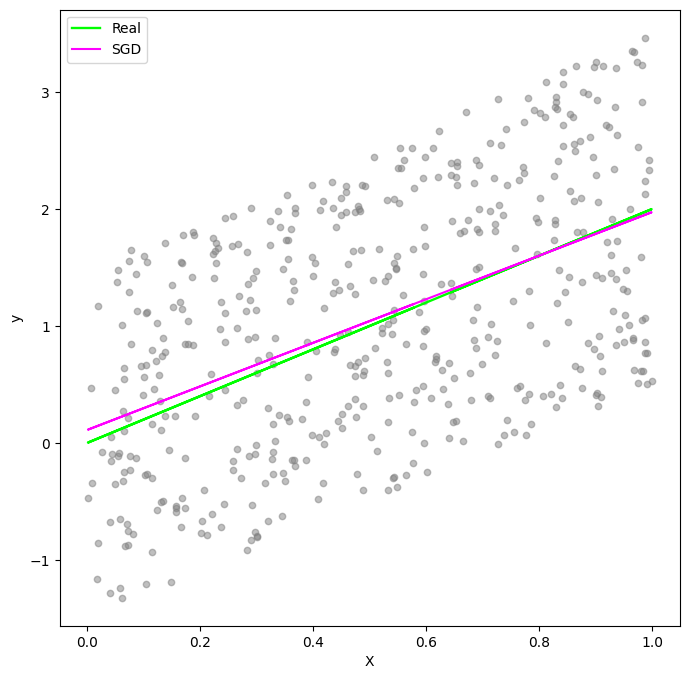

In [108]:
import numpy as np

def linear_regression(X, y, learning_rate=0.01, max_epochs=10000):
    def mse_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        mse = np.mean((y - y_pred) ** 2)
        return mse
    
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    x0 = np.array([0, 0], dtype=float)

    result, _, _ = stochastic_gradient_descent(mse_loss, x0, learning_rate=learning_rate, max_epochs=max_epochs, batch_size=1, apply_min=True)

    return result

# ======== style-parameters
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))
# =========================

# Генерируем случайные точки
real_weight, real_bias = 2, 0

dots_count = 500
variance = 3
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

result = linear_regression(X, y)

# Выводим найденные коэффициенты
print("Коэффициенты уравнения прямой:")
print(f"y = {real_weight:.2f} * x + {real_bias:.2f}")
print("Вычисленные коэффициенты уравнения прямой:")
print(f"y = {result[0]:.2f} * x + {result[1]:.2f}")

plt.scatter(X, y, color='gray', alpha=0.5, s=20.8)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, real_weight * X + real_bias, label='Real', color='lime', linewidth=1.7)
plt.plot(X, result[0] * X + result[1], label='SGD', color='magenta', linewidth=1.5)
plt.legend()
plt.show()


## SGD with Momentum

In [109]:
def momentum_gradient(xs, ys, w, lr, batch_size, epochs):
    def momentum(cur_w, cur_momentum, grad, gamma, lr):
        next_momentum = gamma * cur_momentum + (1 - gamma) * grad
        next_w = cur_w - lr * cur_momentum
        return next_w, next_momentum
    
    cur_w = np.copy(w)
    cur_momentum = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        grad = np.zeros(len(w), dtype=float)
        
        if pos + batch_size - 1 >= cnt_dots:
            pos = 0
            random.shuffle(perm)

        for j in range(pos, pos + batch_size):
            grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

        pos += batch_size
        grad //= batch_size
        cur_w, cur_momentum = momentum(cur_w, cur_momentum, grad, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])
        
    return points

### Nesterov SGD

In [110]:
def nesterov_gradient(xs, ys, w, lr, batch_size, epochs):
    def nesterov(cur_w, cur_momentum, grad, gamma, lr):
        next_momentum = gamma * cur_momentum + (1 - gamma) * grad
        next_w = cur_w - lr * next_momentum
        return next_w, next_momentum
    
    cur_w = np.copy(w)
    cur_nesterov = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        grad = np.zeros(len(w), dtype=float)

        if pos + batch_size - 1 >= cnt_dots:
            pos = 0
            random.shuffle(perm)

        for j in range(pos, pos + batch_size):
            grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w - lr(epoch, batch_size) * 0.9 * cur_nesterov)

        pos += batch_size
        grad //= batch_size
        cur_w, cur_nesterov = nesterov(cur_w, cur_nesterov, grad, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])

    return points

### AdaGrad

In [111]:
def ada_grad_gradient(xs, ys, w, lr, batch_size, epochs):
    def ada_grad(cur_w, cur_grad, grad, lr):
        new_grad = cur_grad + np.square(-grad)
        new_w = cur_w + lr * np.divide(grad, np.sqrt(new_grad))
        return new_w, new_grad
    
    cur_w = np.copy(w)
    cur_ada_grad = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0
    
    for epoch in range(epochs):
        for _ in range(cnt_dots // batch_size):
            grad = np.zeros(len(w), dtype=float)

            if pos + batch_size - 1 >= cnt_dots:
                pos = 0
                random.shuffle(perm)

            for j in range(pos, pos + batch_size):
                grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

            pos += batch_size
            grad //= batch_size
            cur_w, cur_ada_grad = ada_grad(cur_w, cur_ada_grad, -grad, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])

    return points

### RMSProp

In [112]:
def rms_prop_gradient(xs, ys, w, lr, batch_size, epochs):
    def rms_prop(cur_w, cur_grad, grad, gamma, lr, eps=1e-6):
        new_grad = gamma * cur_grad + (1 - gamma) * np.square(-grad)
        new_w = cur_w + lr * np.divide(grad, np.sqrt(new_grad) + eps)
        
        return new_w, new_grad
    
    cur_w = np.copy(w)
    cur_prop_grad = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        for _ in range(cnt_dots // batch_size):
            grad = np.zeros(len(w), dtype=float)
            print(grad)
            
            if pos + batch_size - 1 >= cnt_dots:
                pos = 0
                random.shuffle(perm)

            for j in range(pos, pos + batch_size):
                grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

            pos += batch_size
            grad //= batch_size
            cur_w, cur_prop_grad = rms_prop(cur_w, cur_prop_grad, -grad, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])
        
    return points

### Adam SGD

In [113]:
def adam_gradient(xs, ys, w, lr, batch_size, epochs):
    def adam(cur_w, cur_momentum, cur_grad, grad, beta, gamma, lr, eps=1e-6):
        new_momentum = beta * cur_momentum + (1 - beta) * grad
        new_grad = gamma * cur_grad + (1 - gamma) * np.square(grad)
        new_w = cur_w - lr * np.divide(new_momentum, np.sqrt(new_grad) + eps)

        return new_w, new_momentum, new_grad
        
    cur_w = np.copy(w)
    cnt_dots = len(xs)
    cur_prop_grad = np.zeros(len(w), dtype=float)
    cur_momentum = np.zeros(len(w), dtype=float)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        for _ in range(cnt_dots // batch_size):
            grad = np.zeros(len(w), dtype=float)

            if pos + batch_size - 1 >= cnt_dots:
                pos = 0
                random.shuffle(perm)

            for j in range(pos, pos + batch_size):
                grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

            pos += batch_size
            grad //= batch_size
            cur_w, cur_momentum, cur_prop_grad = adam(cur_w, cur_momentum, cur_prop_grad, grad, 0.9, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])
        
    return points